<a href="https://colab.research.google.com/github/Adori77/Data_Scientist/blob/main/Ejercicio_Gu%C3%ADado_DecisionTreeRegresor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPARATION SUMMARY


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# MinMaxScaler es para normalizar un dataset
# StandardScaler es para normalizar un dataset
# LabelEncoder sirve para normalizar labels, también normaliza labels no-numéricas
# mientras tengan posicionamiento y sean comparables

Carguemos un dataset de seaborn sobre los trayectos en Taxi en NY.

Las columnas son las siguientes:
- **pickup**: Timestamp de recogida del cliente
- **dropoff**: Timestamp de entrega del cliente
- **passengers**: Número de pasajeros
- **distance**: Distancia en metros
- **fare**: Tarifa
- **tip**: Propina
- **tolls**: Peajes
- **total**: Ticket total (fare + tolls + propina)
- **color**: Color del taxi
- **payment**: Método de pago
- **pickup_zone**: Zona de recogida
- **dropoff_zone**: Zona de entrega
- **pickup_borough**: Barrio de recogida
- **dropoff_borough**: Barrio de entrega

Nuestro target será averiguar qué propina (tip) podemos esperar.
Cuidado con el data leakage (**fuga de datos**) (Pista: la suma de 2 variables enmascara nuestro target)

In [ ]:
# Load data
data = sns.load_dataset("taxis")

In [ ]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


# Variables numéricas

In [ ]:
num_var = 'distance'

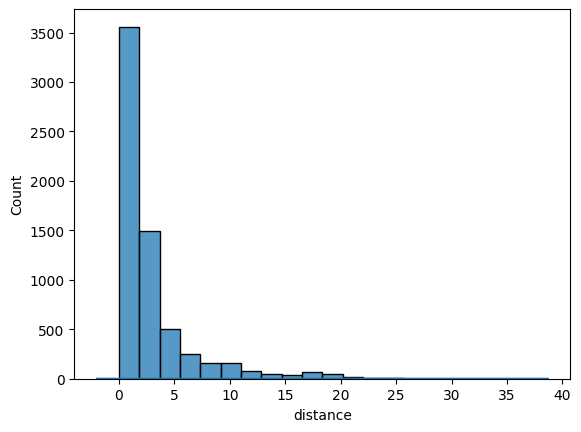

In [ ]:
# Create just a figure and only one subplot
# plt.subplot(1, 2, 1) : the figure has 1 row, 2 columns, and this plot is the first plot.
# La función crea varios gráficos en una sola figura, en este caso solo queremos un gráfico
fig, ax = plt.subplots()
# ax es axes for the plot
sns.histplot(data[num_var], bins=20, ax=ax)
# Vemos que la mayoría de los trayectos son cortos (no más de 2 millas)
# sns.kdeplot(data[num_var], ax=ax)
plt.show()

## Modelos geométricos

### Conversión de magnitud

Expresar magnitudes en otra escala.
- aplicando logaritmos - cuidado con valores negativos.
- dividiendo entre 10, 100, 1.000, etc.
- raíz cuadrada


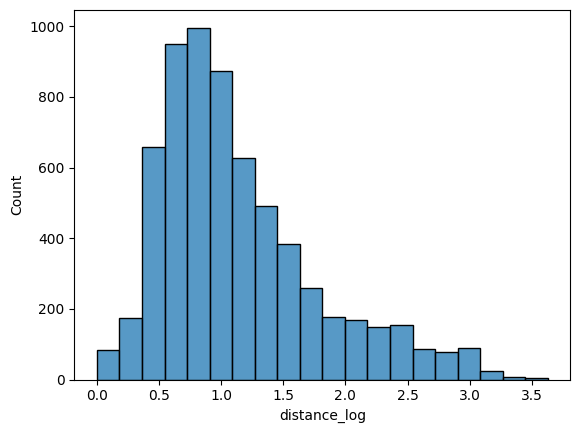

In [ ]:
# Logaritmo
data[num_var+'_log'] = data[num_var].apply(lambda x: np.log(x+1)) # CUIDADO! Logaritmo no acepta negativos ni 0
# Transformando a logaritmo podemos observar una distribución más clara sobre cuales son las distancias más comunes
fig, ax = plt.subplots()
sns.histplot(data[num_var+'_log'], bins=20, ax=ax)
plt.show()

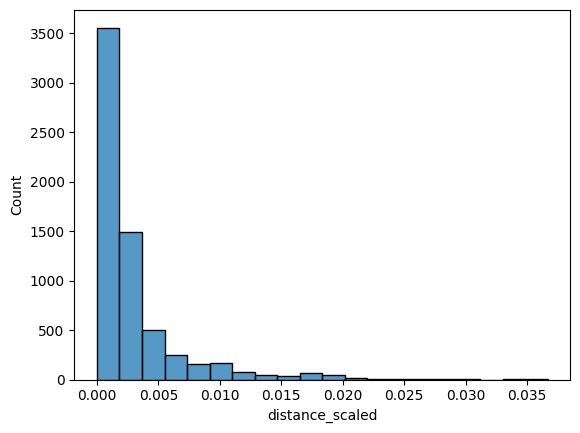

In [ ]:
# Escala
# Tendría sentido si distance estuviera expresada en metros, y quisieramos pasarla a km.
data[num_var+'_scaled'] = data[num_var]/1000 # De metros a km
# Observar que cuando se usa el mismo número para hacer operaciones con todo el dataset no es necesario crear funciones lambda para aplicarlo en todos los datos
fig, ax = plt.subplots()
sns.histplot(data[num_var+'_scaled'], bins=20, ax=ax)
plt.show()

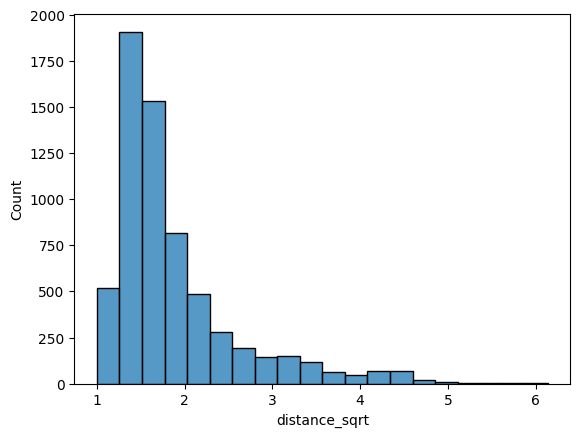

In [ ]:
# Raíz cuadrada

data[num_var+'_sqrt'] = data[num_var].apply(lambda x: np.sqrt(x+1) ) # No acepta valores negativos!

fig, ax = plt.subplots()
sns.histplot(data[num_var+'_sqrt'], bins=20, ax=ax)
plt.show()

### Tratamiento de outliers (clipping)

Limitar valores muy extremos.

In [ ]:
num_var = 'fare'
# Es la tarifa

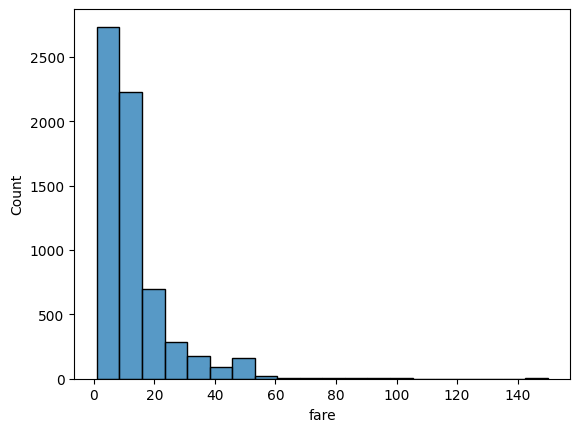

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data[num_var], bins=20, ax=ax)
# La mayoría de las tarifas son pequeñas ya que las distancias recorridas también lo son
#sns.kdeplot(data[num_var], ax=ax)
plt.show()

In [ ]:
# En la gráfica observamos que la mayoría de los datos se encuentran entre 0 y 60
# Usamos el método clip donde especificamos que los valores menores a cero sean 0 y los mayores a 60 sean 60
data[num_var+'_clip'] = data[num_var].clip(lower=0, upper=60)

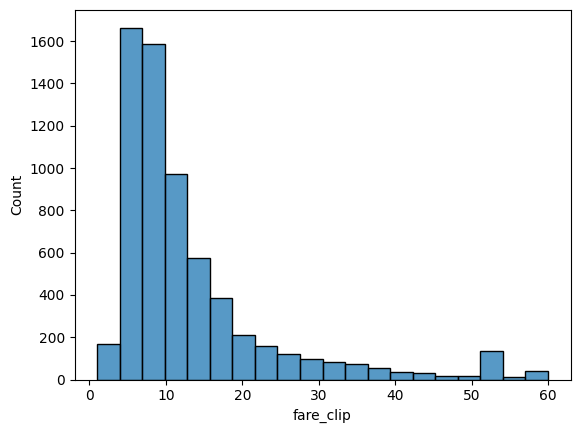

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data[num_var+'_clip'], bins=20, ax=ax)
#sns.kdeplot(data[num_var], ax=ax)
plt.show()

### Estandarización

Expresamos la variable de modo que la media quede en el 0, y las distancias queden expresadas en función de la desviación estándar.

$ Standard \ scaler = \frac{x - mean}{stddev}$

In [ ]:
# StandardScaler es para normalizar un dataset
std_scaler = StandardScaler()
std_scaler.fit(data[[num_var]])
# Dejamos que Standard Scaler aprenda los valores con el método fit(), que calcule la media y la desviación estandar

data[num_var+'_std'] = std_scaler.transform(data[[num_var]])
# transform() permite obtener la desviación estándar
# Se ajustaron los valores para que la media quedara en el 0 y el resto en múltiplos de la desviación estándar

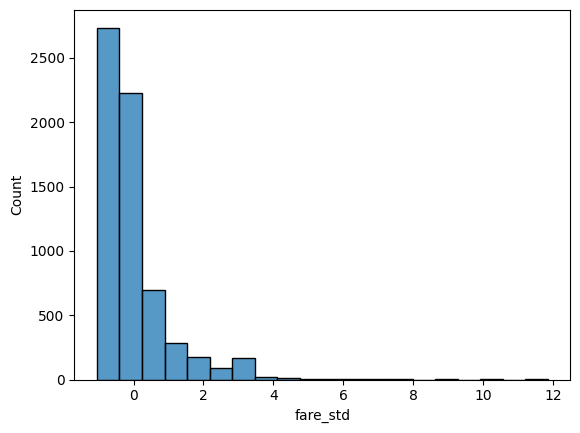

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data[num_var+'_std'], bins=20, ax=ax)
#sns.kdeplot(data[num_var], ax=ax)
plt.show()

### Normalización

Expresamos la variable entre 0 y 1. El mínimo será ahora 0 y el máximo 1.

$ Min-Max \ scaler = \frac{x - min}{max-min}$

In [ ]:
# MinMaxScaler es para normalizar un dataset
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(data[[num_var]])

data[num_var+'_norm'] = minmax_scaler.transform(data[[num_var]])
# Aqui veremos los valores entre 0 y 1

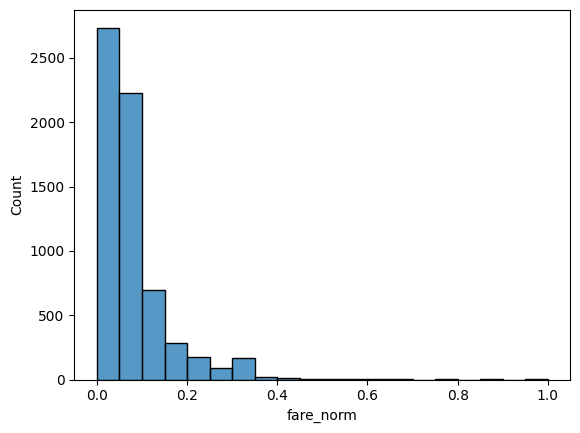

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data[num_var+'_norm'], bins=20, ax=ax)
#sns.kdeplot(data[num_var], ax=ax)
plt.show()

## Modelos lógicos

## Discretización de variables continuas

In [ ]:
num_var = 'fare'

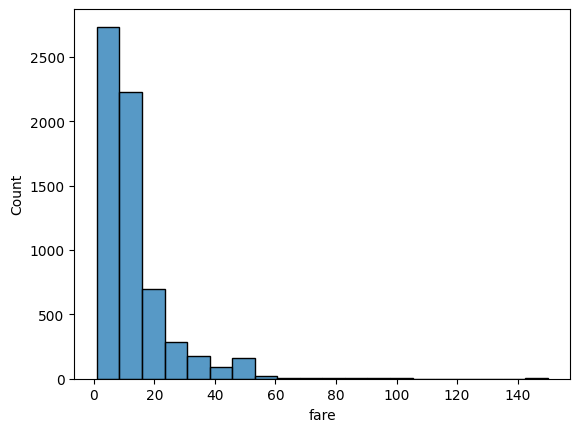

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data[num_var], bins=20, ax=ax)
#sns.kdeplot(data[num_var], ax=ax)
plt.show()

### cut (Esquidistante)

Extraemos el mínimo y el máximo de los datos de nuestra variables.
Y generamos un rango o delta:

$delta (\Delta) = \frac{max - min}{N}$

donde N (bins) es el número de tramos que queremos y delta el rango entre los tramos.

In [ ]:
# cut: bins marca el número de tramos que queremos
data[num_var+'_cut'] = pd.cut(data[num_var], bins=10)

In [ ]:
# Obtenemos una variable categórica la cual se especifica en rangos
data[num_var+'_cut']

0       (0.851, 15.9]
1       (0.851, 15.9]
2       (0.851, 15.9]
3        (15.9, 30.8]
4       (0.851, 15.9]
            ...      
6428    (0.851, 15.9]
6429     (45.7, 60.6]
6430     (15.9, 30.8]
6431    (0.851, 15.9]
6432    (0.851, 15.9]
Name: fare_cut, Length: 6433, dtype: category
Categories (10, interval[float64, right]): [(0.851, 15.9] < (15.9, 30.8] < (30.8, 45.7] <
                                            (45.7, 60.6] ... (90.4, 105.3] < (105.3, 120.2] <
                                            (120.2, 135.1] < (135.1, 150.0]]

In [ ]:
data[num_var+'_cut'].value_counts()
# Aqui contamos los valores que se encuentran en estos rangos de tarifas

(0.851, 15.9]     4966
(15.9, 30.8]       983
(30.8, 45.7]       269
(45.7, 60.6]       184
(60.6, 75.5]        15
(75.5, 90.4]         7
(90.4, 105.3]        4
(135.1, 150.0]       3
(105.3, 120.2]       1
(120.2, 135.1]       1
Name: fare_cut, dtype: int64

### qcut (Equipopulation)

Similar al anterior con la pecularidad de que los tramos nos los definen los cuartiles. De manera que dejamos la misma población (population) en cada tramo.



In [ ]:
# qcut
data[num_var+'_qcut'] = pd.qcut(data[num_var], q=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# q son los cuartiles que queremos considerar

In [ ]:
# qcut es una función que puede ‘discretizar’ una variable. Por ejemplo, deseamos agregar una columna que contenga:
# “Muy pocos”, “Pocos”, “Considerable”, “Muchos”
# De acuerdo a los votos obtenidos.

# Lo haríamos de ésta forma:

# clasificacion = ["Muy pocos", "Pocos", "Considerable", "Muchos"]
# df["Clasif"] = pd.qcut(df["votes"], 4 , clasificacion)
# print (tabulate(df.sample(5), headers='keys'))

# Primero ponemos las etiquetas en una lista. Luego usamos el método qcut para separar en 4 grupos la columna votes.
# Se asignará el valor correspondiente de la lista clasificación a la columan Clasif.

In [ ]:
data[num_var+'_qcut']

0          (6.0, 7.0]
1        (0.999, 5.0]
2          (7.0, 8.0]
3       (26.0, 150.0]
4          (8.0, 9.5]
            ...      
6428     (0.999, 5.0]
6429    (26.0, 150.0]
6430     (13.5, 17.0]
6431       (5.0, 6.0]
6432     (13.5, 17.0]
Name: fare_qcut, Length: 6433, dtype: category
Categories (10, interval[float64, right]): [(0.999, 5.0] < (5.0, 6.0] < (6.0, 7.0] < (7.0, 8.0] < ... <
                                            (11.0, 13.5] < (13.5, 17.0] < (17.0, 26.0] <
                                            (26.0, 150.0]]

In [ ]:
data[num_var+'_qcut'].value_counts()

(0.999, 5.0]     852
(8.0, 9.5]       684
(5.0, 6.0]       657
(11.0, 13.5]     648
(26.0, 150.0]    642
(6.0, 7.0]       619
(7.0, 8.0]       608
(13.5, 17.0]     593
(17.0, 26.0]     593
(9.5, 11.0]      537
Name: fare_qcut, dtype: int64

¿Y qué pasa si tenemos nulos?
Pues tan sencillo como ponerlos como una categoría distinta.

In [ ]:
# Si tuvieramos nulos

# Añadimos algunos
data.loc[[24,400,255], num_var] = np.nan

# Hacemos el pd.qcut
data[num_var+'_qcut'] = pd.qcut(data[num_var], q=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
data[num_var+'_qcut'] = data[num_var+'_qcut'].astype(str) # Sino no nos deja añadir una nueva categoría

data.loc[data[num_var].isnull(), num_var+'_qcut'] = 'Missing'
data[num_var+'_qcut'].value_counts()
# Si tienes categorías con muchos valores faltantes puedes indicarlo como 'Missing'

(0.999, 5.0]     850
(8.0, 9.5]       683
(5.0, 6.0]       657
(11.0, 13.5]     648
(26.0, 150.0]    642
(6.0, 7.0]       619
(7.0, 8.0]       608
(13.5, 17.0]     593
(17.0, 26.0]     593
(9.5, 11.0]      537
Missing            3
Name: fare_qcut, dtype: int64

### Decision Tree

Utilizamos un Decision Tree para que nos haga los splits según lo que él decida. Patrones que pueden estar ocultos para nosotros.

Para ello utilizamos el target (en este caso: tip)

In [ ]:
data[num_var].fillna(-1, inplace=True)
# Quitar los valores que no manejan números (Los Missing)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Con max_leaf_nodes controlamos el máximo de categorías salientes
dt = DecisionTreeRegressor(random_state=0, max_depth=5, max_leaf_nodes=10)
# max_leaf_nodes no dar más de 10 categorías
# max_depth para que sepa generalizar (se verá más adelante)

In [ ]:
dt.fit(data[[num_var]], data['tip'])

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10, random_state=0)

In [ ]:
data[num_var+'_cat'] = dt.predict(data[[num_var]])
data[num_var+'_cat'].value_counts()
# Son distribuciones con otra serie de patrones invisibles para nosotros

1.452380     2109
0.982755     1510
1.971608     1269
2.593349      851
3.934026      380
8.786894      132
4.818168      131
1.319412       34
11.195385      13
0.000000        4
Name: fare_cat, dtype: int64

¿Y qué pasa si tenemos nulos?

Hay 2 enfoques:
- Ver si el nulo tiene algún impacto pasándolo por el modelo (codificarlo como un valor muy extremo para que no afecte a la distribución real)
- No tratar el nulo y añadirlo como nueva categoría (como hemos hecho antes).

### Redondeo

De esta manera evitamos que features continuas con mucha cardinalidad (muchos valores únicos) aparezcan como variables muy predictoras cuando la realidad es opuesta. Esto suele pasar mucho en modelos de árboles de decisión.

Más adelante los veréis!

Nota: El problema en realidad está en el concepto de Feature Importance. Se espera que te diga tus mejores variables, pero está muy sesgada al tipo de variable. Mejor optar por otras maneras: Permutaciones o Shapley Values.

https://www.r-bloggers.com/2018/06/be-aware-of-bias-in-rf-variable-importance-metrics/

In [ ]:
num_var = 'distance'
data[num_var+'_round'] = data[num_var].round()
data[[num_var, num_var+'_round']]

,distance,distance_round
0,1.60,2.0
1,0.79,1.0
2,1.37,1.0
3,7.70,8.0
4,2.16,2.0
...,...,...
6428,0.75,1.0
6429,18.74,19.0
6430,4.14,4.0
6431,1.12,1.0


# Variables categóricas

## Modelos geométricos

Estos modelos tan sólo trabajan con variables numéricas.

### Formato ordinal

La variable passengers es una variable numérica que podría convertirse a ordinal.

Esta variable tiene un sentido del orden así que se podría entrar al modelo.

Pocas variables son de este tipo.

In [ ]:
cat_var = 'passengers'

data[cat_var].value_counts()

1    4678
2     876
5     277
3     243
6     153
4     110
0      96
Name: passengers, dtype: int64

### One Hot Encoding

Variables con categorías que no se pueden pasar a ordinales, pero nos gustaría que el modelo geométrico las viera.

Por ejemplo: pickup_borough.


In [ ]:
cat_var = 'pickup_borough'

data[cat_var].value_counts()

Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64

Generaremos tantas columnas como barrios tengamos.

In [ ]:
pd.get_dummies(data, columns=['pickup_borough'])

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,fare_std,fare_norm,fare_cut,fare_qcut,fare_cat,distance_round,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,...,-0.527324,0.040268,"(0.851, 15.9]","(6.0, 7.0]",1.452380,2.0,0,0,1,0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,...,-0.700471,0.026846,"(0.851, 15.9]","(0.999, 5.0]",0.982755,1.0,0,0,1,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,...,-0.484038,0.043624,"(0.851, 15.9]","(7.0, 8.0]",1.452380,1.0,0,0,1,0
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,...,1.204142,0.174497,"(15.9, 30.8]","(26.0, 150.0]",3.934026,8.0,0,0,1,0
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,...,-0.354178,0.053691,"(0.851, 15.9]","(8.0, 9.5]",1.452380,2.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,...,-0.743757,0.023490,"(0.851, 15.9]","(0.999, 5.0]",0.982755,1.0,0,0,1,0
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,...,3.887914,0.382550,"(45.7, 60.6]","(26.0, 150.0]",1.319412,19.0,0,0,0,1
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,...,0.251835,0.100671,"(15.9, 30.8]","(13.5, 17.0]",2.593349,4.0,0,1,0,0
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,...,-0.613898,0.033557,"(0.851, 15.9]","(5.0, 6.0]",0.982755,1.0,0,1,0,0


In [ ]:
# get_dummies Convert categorical variable into dummy/indicator variables.

# Each variable is converted in as many 0/1 variables as there are different values.
# Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

# La desventaja es el número de columnas añadidas

## Modelos lógicos

### One hot encoding

Como hemos visto arriba.

### Formato ordinal

Como hemos visto arriba.

### Label Encoding

Convertimos una variable string a categórica. Se le asigna un id.

In [ ]:
cat_var = 'pickup_borough'
le = LabelEncoder()
# Convertir una variable en categórica (pasarla como un número)
data[cat_var+'_enc'] = le.fit_transform(data[cat_var])
# Acomoda y Transforma data[cat_var] usando LabelEncoder()

In [ ]:
data[[cat_var, cat_var+'_enc']].value_counts()

pickup_borough  pickup_borough_enc
Manhattan       2                     5268
Queens          3                      657
Brooklyn        1                      383
Bronx           0                       99
dtype: int64

### Agrupamiento de categorías

Variables categóricas con muchas categorías únicas.

Ley de Pareto: Reducir a aquellas categorías más importantes.

In [ ]:
cat_var = 'pickup_zone'

In [ ]:
data[cat_var].value_counts()

Midtown Center                         230
Upper East Side South                  211
Penn Station/Madison Sq West           210
Clinton East                           208
Midtown East                           198
                                      ... 
Homecrest                                1
Bedford Park                             1
Riverdale/North Riverdale/Fieldston      1
Hollis                                   1
Hillcrest/Pomonok                        1
Name: pickup_zone, Length: 194, dtype: int64

In [ ]:
top = data[cat_var].value_counts().to_frame().head(10)
top
# Escojo las variables más significativas top 10
# to_frame covierte Series en DataFrame

,pickup_zone
Midtown Center,230
Upper East Side South,211
Penn Station/Madison Sq West,210
Clinton East,208
Midtown East,198
Upper East Side North,186
Times Sq/Theatre District,184
Union Sq,180
Lincoln Square East,177
Murray Hill,162


In [ ]:
top = data[cat_var].value_counts().to_frame().head(10)
data[cat_var+'_grouped'] = data[cat_var]

# Creamos una nueva variable categórica donde si data[cat_var] no pertenece al top 10
# Cree una nueva variable categórica llamada 'Other'
data.loc[data[cat_var].isin(top.index) == False, cat_var+'_grouped'] = 'Other'
data[cat_var+'_grouped'].value_counts()

Other                           4487
Midtown Center                   230
Upper East Side South            211
Penn Station/Madison Sq West     210
Clinton East                     208
Midtown East                     198
Upper East Side North            186
Times Sq/Theatre District        184
Union Sq                         180
Lincoln Square East              177
Murray Hill                      162
Name: pickup_zone_grouped, dtype: int64